In [2]:
import numpy as np
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))


Running on PyMC3 v3.11.2


/tmp/ipykernel_16420/1797889263.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Running on PyMC3 v3.11.2


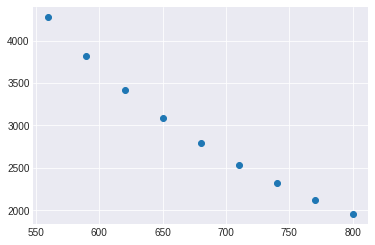

/tmp/ipykernel_16420/1797889263.py:61: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=2000, discard_tuned_samples=True, cores=4, step=step)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, r]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 21 seconds.
The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_16420/1797889263.py:63: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/home/tele/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/tele/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the mode

   mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
r   2.2  0.06    2.10     2.30        0.0      0.0    1009.0    1095.0    1.0
a   8.2  0.15    7.91     8.48        0.0      0.0    1010.0    1092.0    1.0
Valores simulados (a,r):  8.2 2.2
Valores inferidos (a,r):  8.202 2.201


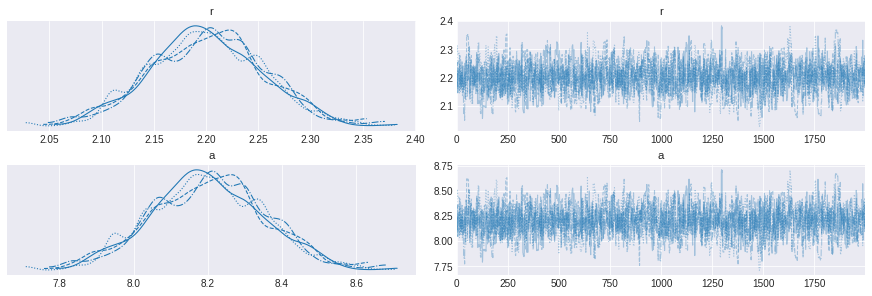

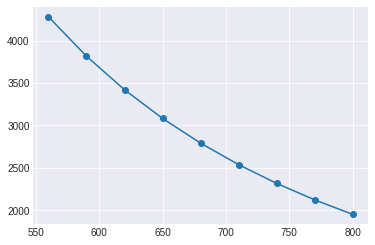

In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

# ---------------------------------------------------    

# or this for some real data with a and r unkown:
# ---------------------------------------------------    
# a set of E values
# E = np.array([560, 590, 610])
# i_s = np.array([5209.73974609, 4500.45019531, 3979.12963867])
# ---------------------------------------------------    



E2 = E+dE/2.0
E1 = E-dE/2.0

#width of interval
dE = 30

# use this for simulated data:
# ---------------------------------------------------    
E = np.arange(560, 830, 30.0)
# exponent for simulating input data
r_s = 2.2
# pre factor for simulating input data
a_s = 8.2

# derived values for i_s
i_s = 10**a_s / (1.0 - r_s)*(E2 ** (1 - r_s) - E1 ** (1- r_s )) 
# plot input data
plt.scatter(E, i_s)
plt.show()


basic_model = pm.Model()
with basic_model:

    r = pm.Uniform('r', lower=1, upper=4)
    a = pm.Uniform('a', lower=1, upper=20)

    I_expected = 10 ** a / (1-r) * (E2 ** (1-r) - E1 ** (1-r)) 

    I_obs = pm.Poisson('I_obs', mu=I_expected, observed=i_s)

    # Use the No-U-Turn Sampler
    step = pm.NUTS()
    # Calculate the trace
    trace = pm.sample(2000, tune=2000, discard_tuned_samples=True, cores=4, step=step)

pm.traceplot(trace)
print(pm.summary(trace).round(2))

print('Valores simulados (a,r): ',a_s, r_s)
r_ = trace['r'].mean()
a_ = trace['a'].mean()
print('Valores inferidos (a,r): ',round(a_,3), round(r_,3))

plt.show()
plt.scatter(E, i_s)
I_ex = 10 ** a_ / (1- r_)  * (E2 ** (1-r_) - E1 ** (1- r_ ))

plt.plot(E, I_ex) 
plt.show()